# Reproducible Research with R 
CCV BootCamp 2025 
Eric Salomaki

Resources for help @brown
COBRE CBHD Computational Biology Core
- Office hours
- https://cbc.brown.edu
- slack channel on ccv-share
- cbc-help@brown.edu

Center for Computation and Visualization
- Office hours
- https://ccv.brown.edu
- ccv-share slack channel
- https://docs.ccv.brown.edu
- support@ccv.brown.edu

## Reproducibility
### What it is

Reproducibility is the extent to which consistent results are obtained when an experiment is repeated using the same data and analysis methodology.  

Replicability is a similar but distinct concept referring to the ability of a researcher to duplicate the results of a prior study if the same procedures are followed but new data are collected.  

We will put an emphasis here on reproducibility in code, so that any issues with replicability are a result of the data collection/pre-processing rather than computational analysis.  

### Why it matters

There are philosophical and practical considerations for ensuring that any code/analysis is reproducible. The idea of reproducibility is one of the fundamental tenets of scientific endeavors and will leave it at that.

More recently, the emphasis on reproducibility has gained attention as large scale data generation has grown ubiquitous and data-driven results are becoming more common across the sciences. 

Importantly, pratical considertations are becoming more common too nowadays. Questions or statements like:

- This is the dataset from the supplementary material, how can i regenerate the plot?
- A lab member provided this script and it runs fine for that person

 

## Using R 

From the [R project](https://www.r-project.org/) homepage

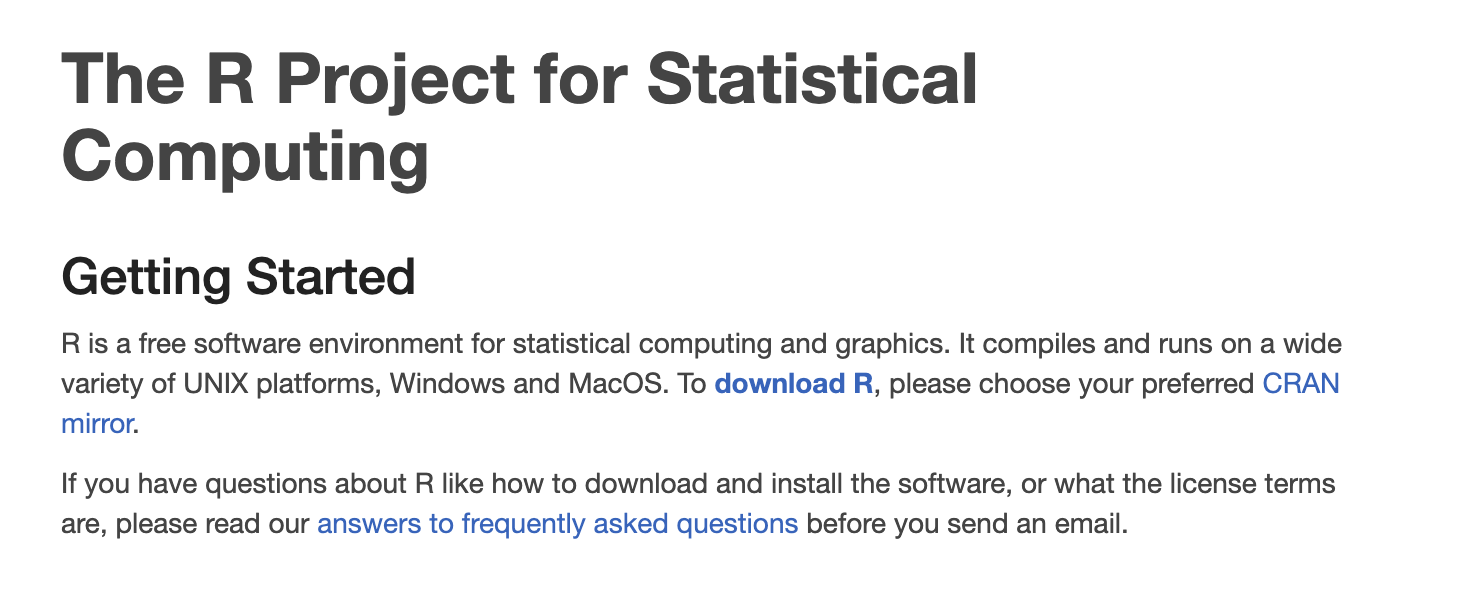

### Multiple ways of using R
There are a few different ways to use R and to program in it. The most popular usually is to use some form of Graphical User Interface that allows for interactive analysis of data via code. We will walk through a couple of them and show you how you can use them on OSCAR, brown's HPC cluster.

#### R within Integrated Development Environments (IDEs)

- R App: Usually local
- Rstudio: Local, or OSCAR or other desktops
- Other Esoteric approaches Eg. Emacs

#### R on the command line

just use plain vanilla R and the command prompt pops up.
On OSCAR the steps would be to
- ssh into OSCAR
- load a specific R module
- type `R` on the command prompt

Obviously, this is a very basic interface and can get very clunky. There is one other way of interacting with R on the command line which is very powerful

**BATCH MODE**

Batch mode implies that you are submitting all your code to the R interpreter to sequentially run the code. There are several implications to this
- Code needs to be pretty independent in terms of how it runs
- Let's you run multiple instances of the same code
- Very similar in principle on to how you submit SBATCH jobs and can be used to submit large number of jobs to the cluster

The way to do is to use a command called `Rscript` provided by default in all R installations. Previously, this used to be `R CMD BATCH` but `Rscript` is now the preferred approach for this. 

Here we will go through the following:
- Using R on the command Line on OSCAR
- Using RStudio on OSCAR via
- Open On Demand
- Desktop
  
 There is plenty of useful documentation in the [OSCAR DOCS](https://docs.ccv.brown.edu/oscar) site 

## Reproducibility with R
This is bit more of an advanced topic and it will be helpful to have some knowledge of the command line, be familiar with installing and troubleshooting R packages. This session will provide some insights and resources to get you started and you can leverage our support through office hours, email and slack to get help as needed

Reproducing the results from an analysis should be straightforward if the entirety of the environment, code, and data remains the same. There are three main aspects to this:

- Code/data
- The dependencies
- The computing environment

We will briefly touch on the easiet first

### Code/Data
  A simple and straightforward way to ensure that code is reproducible is to use Version Control Systems (VCS) used in Software Engineering. Everyone is familiar with Git and Github and this is ubiquitous nowadays. What's harder is to ensure that best practices are used for propagating changes to code. 
  
A simple workflow might be to have:
- both data and code in the same repository (as long as data is small)
- Ensure that changes are committed regularly with explicit commit messages
- All paths to data input and output are relative to the top folder and there is no user interaction required. The R package [here](https://here.r-lib.org/) is fantastic at making this seamless across devices/users.

### Dependencies

The issue with reproducing results of analysis usually stems from conflicts arising due to dependencies. Most R packages rely upon other packages and also possibly external packages/libraries/programs. Over time, as versions change not everything ends up being in sync and this is when conflicts arise. This is especially true when trying to use a package that might not been developed in the current version. Packages from standard repositories such as CRAN and BioConductor are pretty robust as package check are used for ensuring compliance. However, not all combinations of packages are tested together and is quite tedious.

Below are a couple of ways of ensuring reproducibility:

- The `R` function `sessionInfo()`: This function lists all the packages that were used in the current R session along with the exact versions of the package. This is part of the base R system and the output is not pretty. An additional package [sessioinfo](https://cran.r-project.org/web/packages/sessioninfo/index.html) can be used to provide an even more useful output, as well as info for python and your OS in addition to R.  

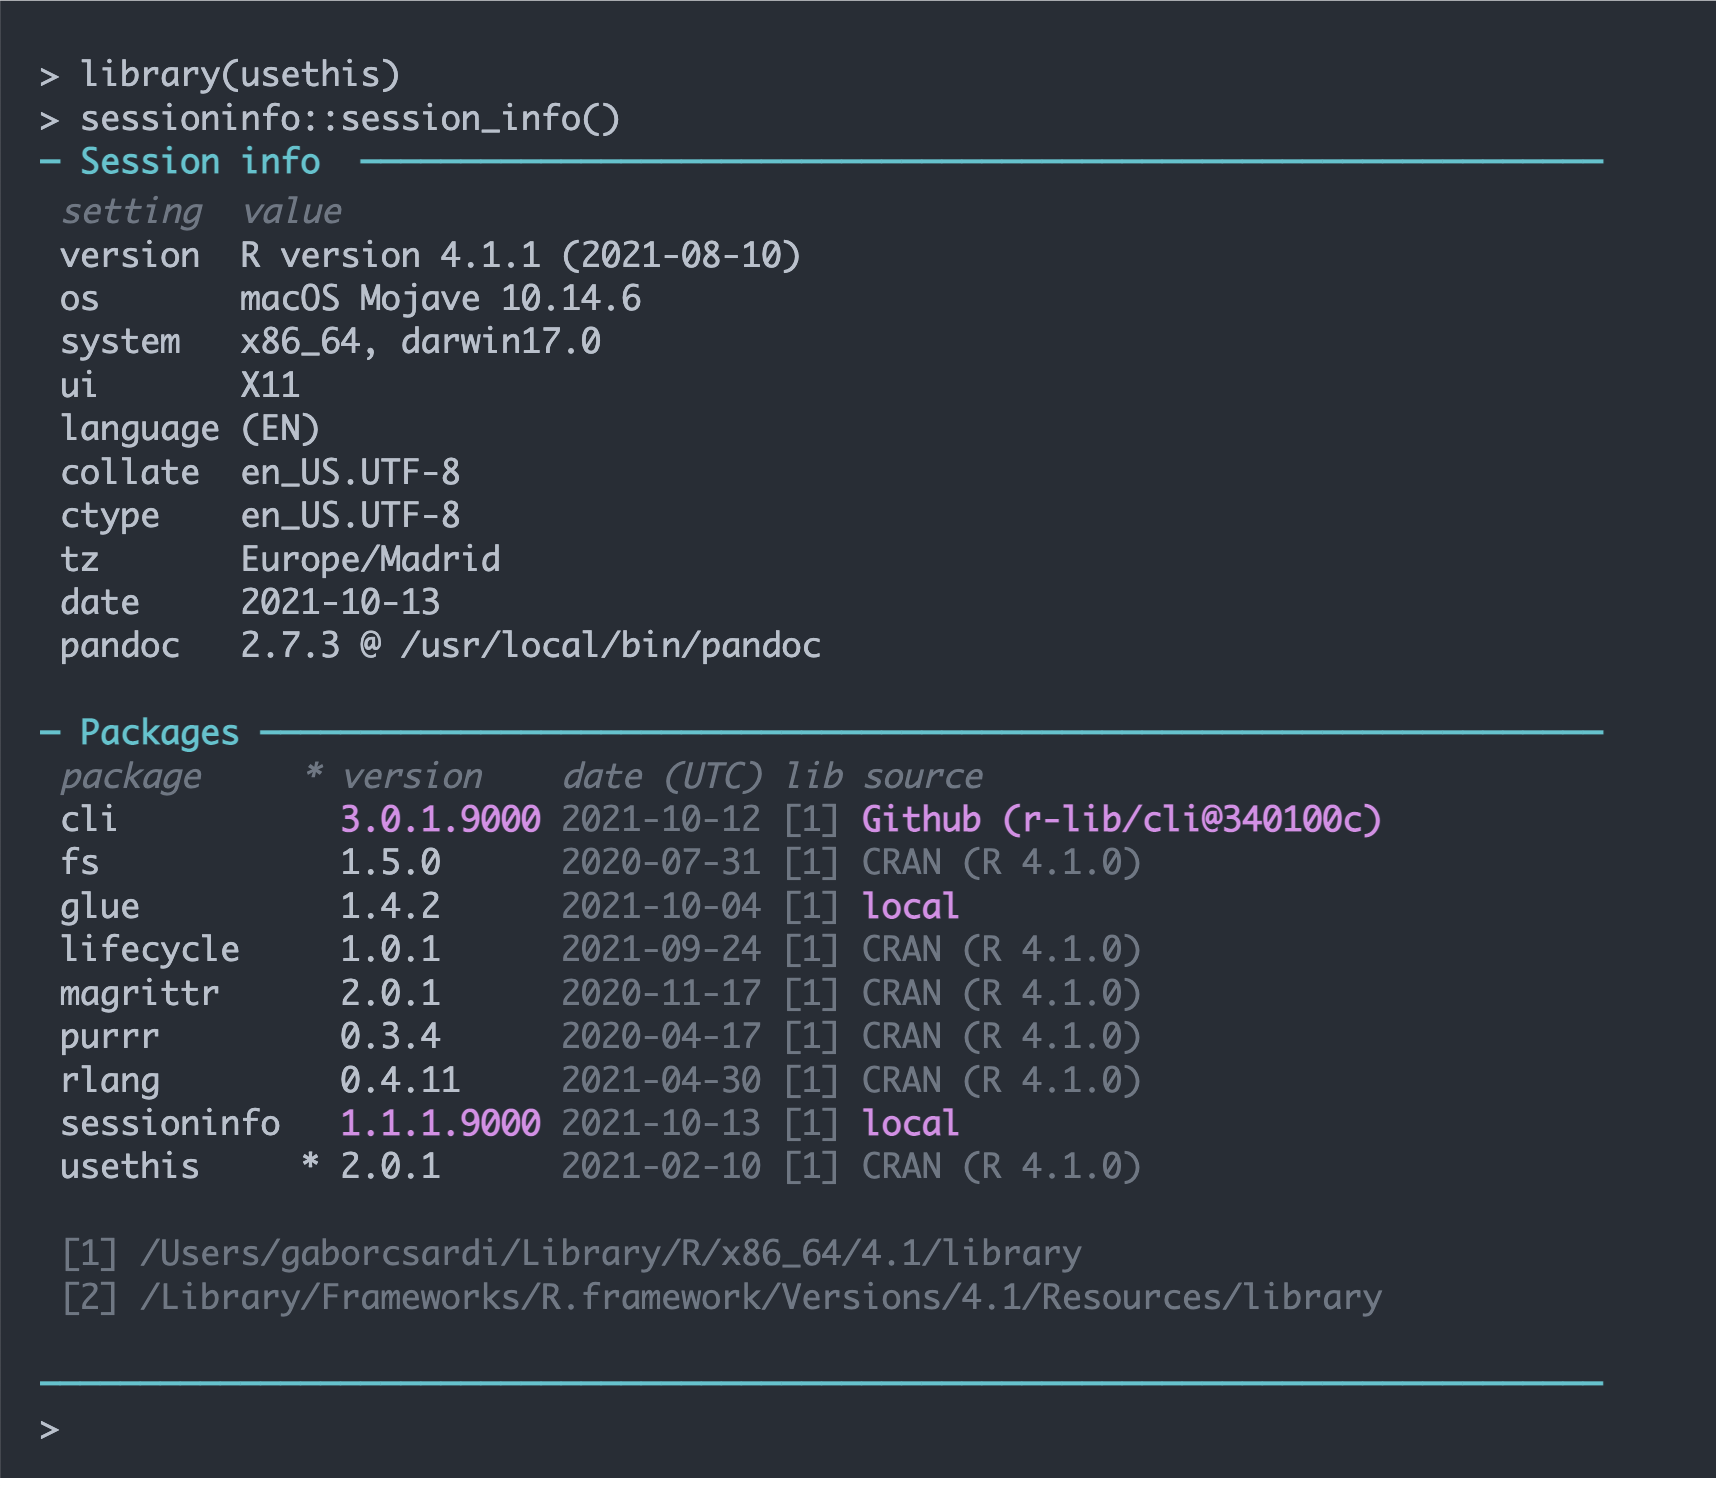

- The `renv` package: This is a package that brings project-local R dependency management to your projects. [Quick Intro](https://cran.r-project.org/web/packages/renv/vignettes/renv.html). `renv` can help you to easily store the state of the packages that are used within your R session and provide simple ways to restore that state.

However, neither of the above is a complete solution since there are other system spcific dependencies that might affect the ability to reproduce the environment in its entirety

### The computing environment
The computing environment includes not just the R packages but also the other system specific or application specific dependencies that might be needed. These include, but are not limited to 
- low level system specific libraries and tools
- higher level ancillary librariies and tools
- dependencies of ancillary libraries and tools

As you can imagine the relationships among the dependencies can be convoluted and this can results in conflicts, which can sometimes be unresolvable. Thankfully, in most situations this is not the case.

Resolving the conflicts directly on the sytem can often be time consuming, especially if there is the need to recompile and re-install multiple times.There are a few popular approaches to resolving these conflicts and they all have their pros and cons. The most popular include:
- Using a Virtual Machine
- Using a package management system such as CONDA or NIX or even `renv`
- Using containers

We will focus on the last approach of using containers, which in our experience has become the most effective apporach recently. This is especially relevant with regards to a workflow that might be transitioning back and forth between your local machine and OSCAR. This has become more relevant especially with the recent implementation of two powerful interfaces on OSCAR:
- Singularity/Apptainer: An alternative container runtime for HPC specific 
- Open On Demand: A web portal for accessing OSCAR


#### Some background  explanation on Containers
The image below nicely captures the differences between containers and VMs and can be easliy extrapolated to how package managers work too 

![img](http://erick.matsen.org/public/images/container-vs-vm.svg)

#### Using what we know
So now that we understand the differences between containers and how they work, how do we use it. We will run through some demos shortly.  

- The first step is to install a docker engine on your machine and this can be found on https://docker.com along with installation instructions
- The next step is to download and run some containers. A simple introduction can be found this blog post http://erick.matsen.org/2018/04/19/docker.html 
- Specifically for R we use the [Rocker Project](https://rocker-project.org/) which provides standard containers running R Studio

Other docker containers can be also easily found on registries such as dockerhub. 

Our workflow consists of the following steps 
- Write Dockerfile
- Build a RStudio container locally (this can take a very long time - the image we use here took 2 hours on my computer)
- Test required packages
- Push build to dockerhub or to OSCAR (via a tar file)
- Convert to singularity image and run via OOD


## Building a Docker image
### The Dockerfile
```
FROM rocker/tidyverse:4.5.0

# R Packages from CRAN
RUN R -e "install.packages('kableExtra', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "install.packages('patchwork', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "install.packages('pheatmap', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "install.packages('ggupset', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "install.packages('ggrepel', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "install.packages('here', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "install.packages('qs2', dependencies=TRUE, repos='http://cran.rstudio.com/')"

# R Packages from Bioconductor
RUN R -e "install.packages('BiocManager', dependencies=TRUE, repos='http://cran.rstudio.com/')"
RUN R -e "BiocManager::install('DESeq2')"
RUN R -e "BiocManager::install('pathview')"
RUN R -e "BiocManager::install('apeglm')"
RUN R -e "BiocManager::install('IHW')"
RUN R -e "BiocManager::install('sva')"

# Add rsession symlink
RUN ln -s /usr/lib/rstudio-server/bin/rsession /usr/local/bin/rsession

```

### Building a docker image
`docker build --platform linux/amd64 -t reproducibility_r_bootcamp .`

```
(base) OIT2D9PXX2:reproducibility_in_r_bootcamp ericsalomaki$ docker build --platform linux/amd64 -t reproducibility_r_bootcamp .
[+] Building 1158.1s (11/17)                                                                                                              docker:desktop-linux
 => => sha256:d5b03f7fb7ce14f444e43db42d9d80223bd6f57a1a8d3fecea05cf79e27dca56 28.49MB / 28.49MB                                                          2.5s
 => => extracting sha256:0622fac788edde5d30e7bbd2688893e5452a19ff237a2e4615e2d8181321cb4e                                                                 1.2s
 => => sha256:a7ba416e7c7617e218f7c11722fb33bb19430e216560103911fcecdb3d194970 899B / 899B                                                                1.2s
 => => sha256:5b1bd52f6fac6b7286c07bfe4062f6adc995c3d55cf8a301a750f14a93d87f98 195.89MB / 195.89MB                                                       14.6s
 => => extracting sha256:e3e932a9ad1c6b0f913322357045082e6abafab230d9bbbed48eefd007b0c9be                                                                 0.0s
 => => sha256:56196f462ee975835c0bf59b186df718ad371fc2f6540c835a1ecb65372aaf31 1.92kB / 1.92kB                                                            2.5s
 => => sha256:171ccb4b4ccbe94ad9c4e9f7776dbda04efb5a8077dbec92a5439a5844c518d8 749B / 749B                                                                2.6s
 => => sha256:389cc5cedf3d8409c4130bd165b4fb87de7f1e3fa95527de025af12f77e929a9 715B / 715B                                                                2.7s
 => => sha256:46142b2d4e0ddf0c1f5ebf3535c136e9a753364c92e83eda3131cb7fc43ccf76 524B / 524B                                                                2.8s
 => => sha256:e31a8528c87b0199ad0ca2276b30d879d5a8e2fd851f8087b7a7c77f57435914 346B / 346B                                                                3.0s
 => => sha256:dfbfa5240d45e589ce32fc803b26aaf26a3afc4829b3dda35b081acb74779ca5 3.20kB / 3.20kB                                                            2.9s
 => => sha256:9899ae157757859afc7963436fad418892f7c36d7b35c11194f7485d34dc91ab 329.12MB / 329.12MB                                                       27.2s
 => => sha256:74c00d4ee623440173bea8f4a135788b9d09307dc65bab86b9efc90038cf6c87 1.28kB / 1.28kB                                                           14.6s
 => => sha256:de38d60ff7bec0c8a51f10028a31a81758869dbdef9ac6bb194e548735255129 33.20MB / 33.20MB                                                         16.7s
 => => sha256:8ab00f67fd2f2dc986a66cc85859f88bfd3e4ccb3d337e8a3dbeb2bb6749058b 1.08kB / 1.08kB                                                           16.7s
 => => sha256:a9f445065b56c1a9f1f737efafd4282d2edc0682db7dd49ede6a6769f11de8a5 1.80MB / 1.80MB                                                           16.9s
 => => sha256:644349ed1c28c7f51e0723789d839ef671bf4355c69d2a3e7bad6581f1daff9d 13.51kB / 13.51kB                                                         17.0s
 => => extracting sha256:604eb24619f2b7435b723c1d129167f8c26c6e2f26a09812999e78d109ea536e                                                                 5.6s
 => => extracting sha256:92c0553b13cb887073c2c6c01c469985fe6fc2aae91d1c3ec34b5110131f79fc                                                                 0.0s
 => => extracting sha256:cbd1dfc3e289cbe8fa7fead818f4c621ddc01f458401538075a581594ce29c6f                                                                 0.0s
 => => extracting sha256:d5b03f7fb7ce14f444e43db42d9d80223bd6f57a1a8d3fecea05cf79e27dca56                                                                 0.5s
 => => extracting sha256:a7ba416e7c7617e218f7c11722fb33bb19430e216560103911fcecdb3d194970                                                                 0.0s
 => => extracting sha256:5b1bd52f6fac6b7286c07bfe4062f6adc995c3d55cf8a301a750f14a93d87f98                                                                 4.2s
 => => extracting sha256:56196f462ee975835c0bf59b186df718ad371fc2f6540c835a1ecb65372aaf31                                                                 0.0s
 => => extracting sha256:171ccb4b4ccbe94ad9c4e9f7776dbda04efb5a8077dbec92a5439a5844c518d8                                                                 0.0s
 => => extracting sha256:389cc5cedf3d8409c4130bd165b4fb87de7f1e3fa95527de025af12f77e929a9                                                                 0.0s
 => => extracting sha256:46142b2d4e0ddf0c1f5ebf3535c136e9a753364c92e83eda3131cb7fc43ccf76                                                                 0.0s
 => => extracting sha256:dfbfa5240d45e589ce32fc803b26aaf26a3afc4829b3dda35b081acb74779ca5                                                                 0.0s
 => => extracting sha256:e31a8528c87b0199ad0ca2276b30d879d5a8e2fd851f8087b7a7c77f57435914                                                                 0.0s
 => => extracting sha256:9899ae157757859afc7963436fad418892f7c36d7b35c11194f7485d34dc91ab                                                                 6.6s
 => => extracting sha256:74c00d4ee623440173bea8f4a135788b9d09307dc65bab86b9efc90038cf6c87                                                                 0.0s
 => => extracting sha256:de38d60ff7bec0c8a51f10028a31a81758869dbdef9ac6bb194e548735255129                                                                 0.6s
 => => extracting sha256:8ab00f67fd2f2dc986a66cc85859f88bfd3e4ccb3d337e8a3dbeb2bb6749058b                                                                 0.0s
 => => extracting sha256:a9f445065b56c1a9f1f737efafd4282d2edc0682db7dd49ede6a6769f11de8a5                                                                 0.1s
 => => extracting sha256:644349ed1c28c7f51e0723789d839ef671bf4355c69d2a3e7bad6581f1daff9d                                                                 0.0s
 => [ 2/13] RUN R -e "install.packages('kableExtra', dependencies=TRUE, repos='http://cran.rstudio.com/')"                                              341.4s
 => [ 3/13] RUN R -e "install.packages('patchwork', dependencies=TRUE, repos='http://cran.rstudio.com/')"                                               458.2s
 => [ 4/13] RUN R -e "install.packages('pheatmap', dependencies=TRUE, repos='http://cran.rstudio.com/')"                                                 19.0s
 => [ 5/13] RUN R -e "install.packages('ggupset', dependencies=TRUE, repos='http://cran.rstudio.com/')"                                                  24.3s
 => [ 6/13] RUN R -e "install.packages('here', dependencies=TRUE, repos='http://cran.rstudio.com/')"                                                     64.3s
 => [ 7/13] RUN R -e "install.packages('BiocManager', dependencies=TRUE, repos='http://cran.rstudio.com/')"                                              15.5s
 => [ 8/13] RUN R -e "BiocManager::install('DESeq2')"                                                                                                   183.7s
 ```

`docker images`  
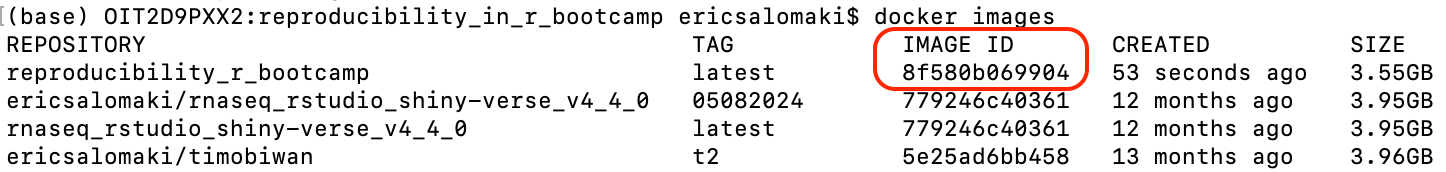

`docker tag 8f580b069904 ericsalomaki/reproducibility_r_bootcamp:may_22_2025`  
`docker push ericsalomaki/reproducibility_r_bootcamp:may_22_2025`

**OR**   

`docker save 8f580b069904 > reproducibility_r_bootcamp.tar`  

## Using a docker image on Oscar requires Singlularity

**First we pull the docker image to Oscar as a singularity image file**  
Login to Oscar on command line:  
This link will open a command line tab in your browser (use Chrome): [Oscar browser in OOD](https://ood.ccv.brown.edu/pun/sys/shell/ssh/oscar2)  
Alternatively you can do this through your terminal on your computer.  

From your home directory in Oscar run the following command:  
`singularity pull rep_in_r.sif docker://ericsalomaki/reproducibility_r_bootcamp:may_22_2025`  
  
Then get and copy the full path to the image for use in OOD:  
`realpath rep_in_r.sif`  


**OR IF YOU HAD BUILT THIS IMAGE ON YOUR DESKTOP USING `docker save`**   
`scp reproducibility_r_bootcamp.tar <username>@ssh.ccv.brown.edu:~/container_images/reproducibility_r_bootcamp.tar`  
`singularity build rep_in_r.sif docker-archive://reproducibility_r_bootcamp.tar`  
Either of these approaches will create the singularity image file you will use to initiate an Rstudio session with in OpenOnDemand  
  

## We also want to clone the GitHub repo for this part of the workshop  
From your home directory run the following:  
If you are not in your home directory run `cd ~`   
Then run:  
` git clone https://github.com/compbiocore/ccv_bootcamp_Reproducibility_R.git`  

## Now lets use our singularity image to start Rstudio on OpenOnDemand  

https://ood.ccv.brown.edu/pun/sys/dashboard/  

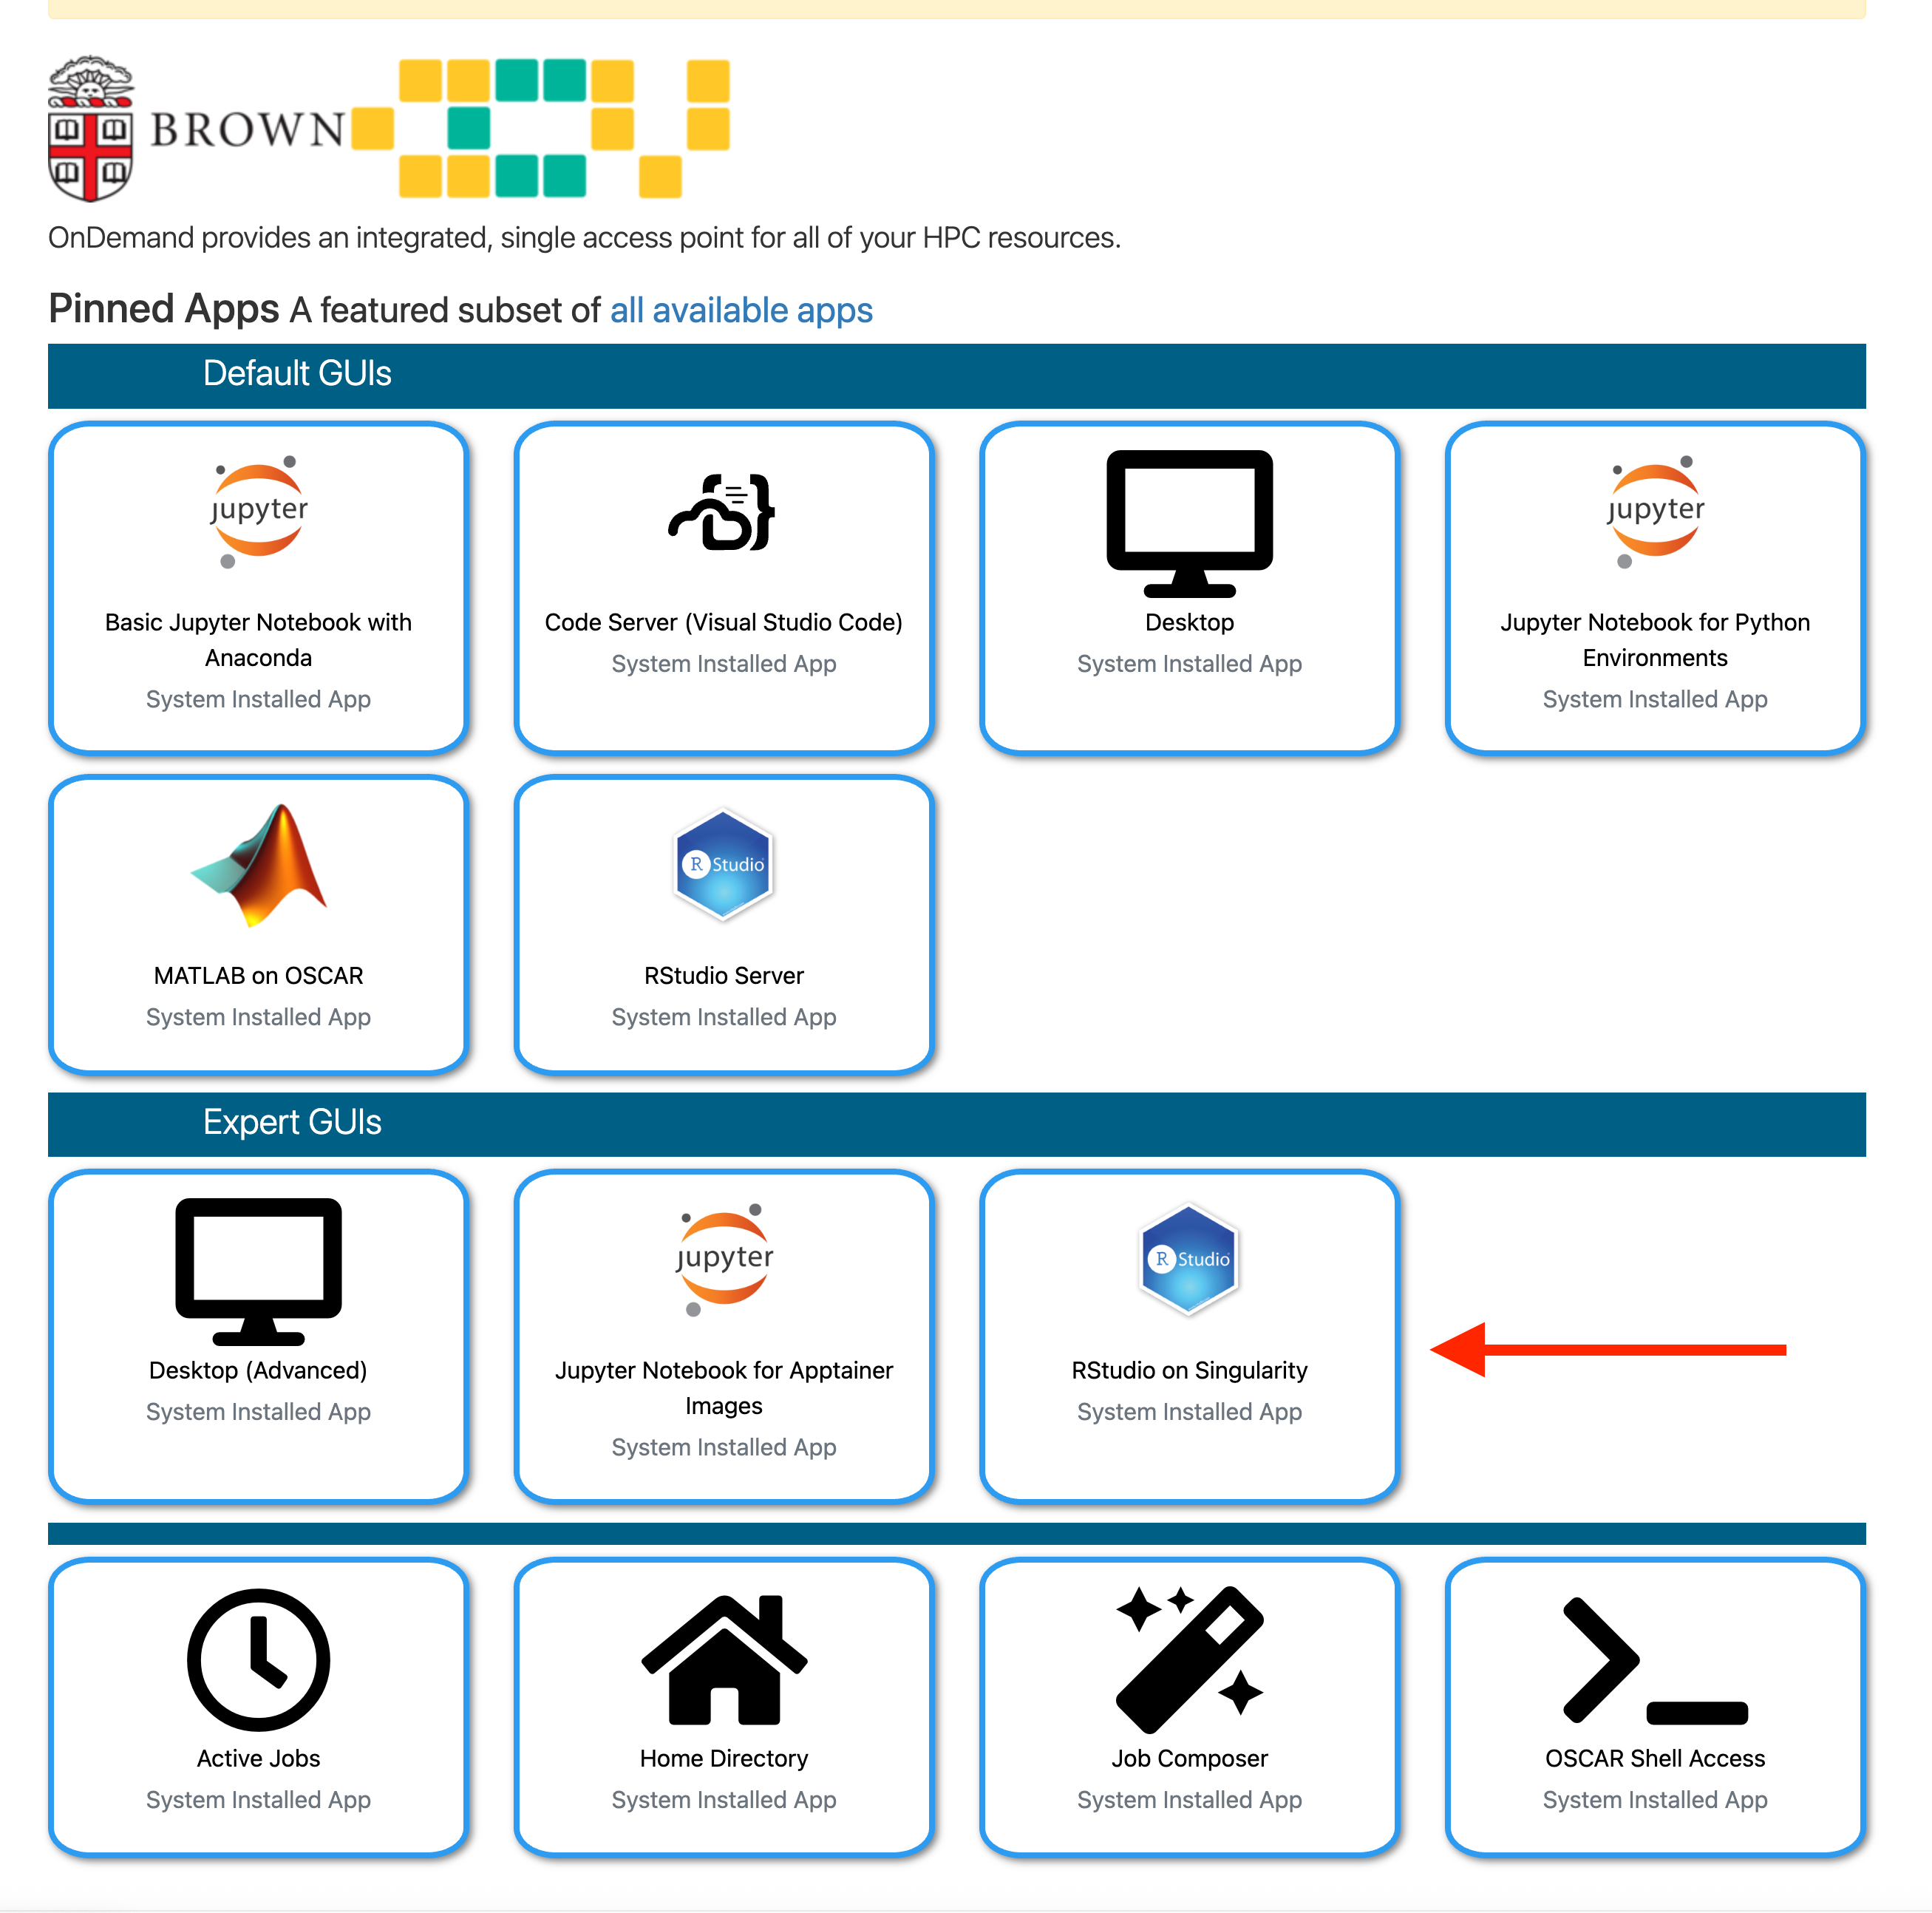  
  
    
    
### Fill out the form with your information:  
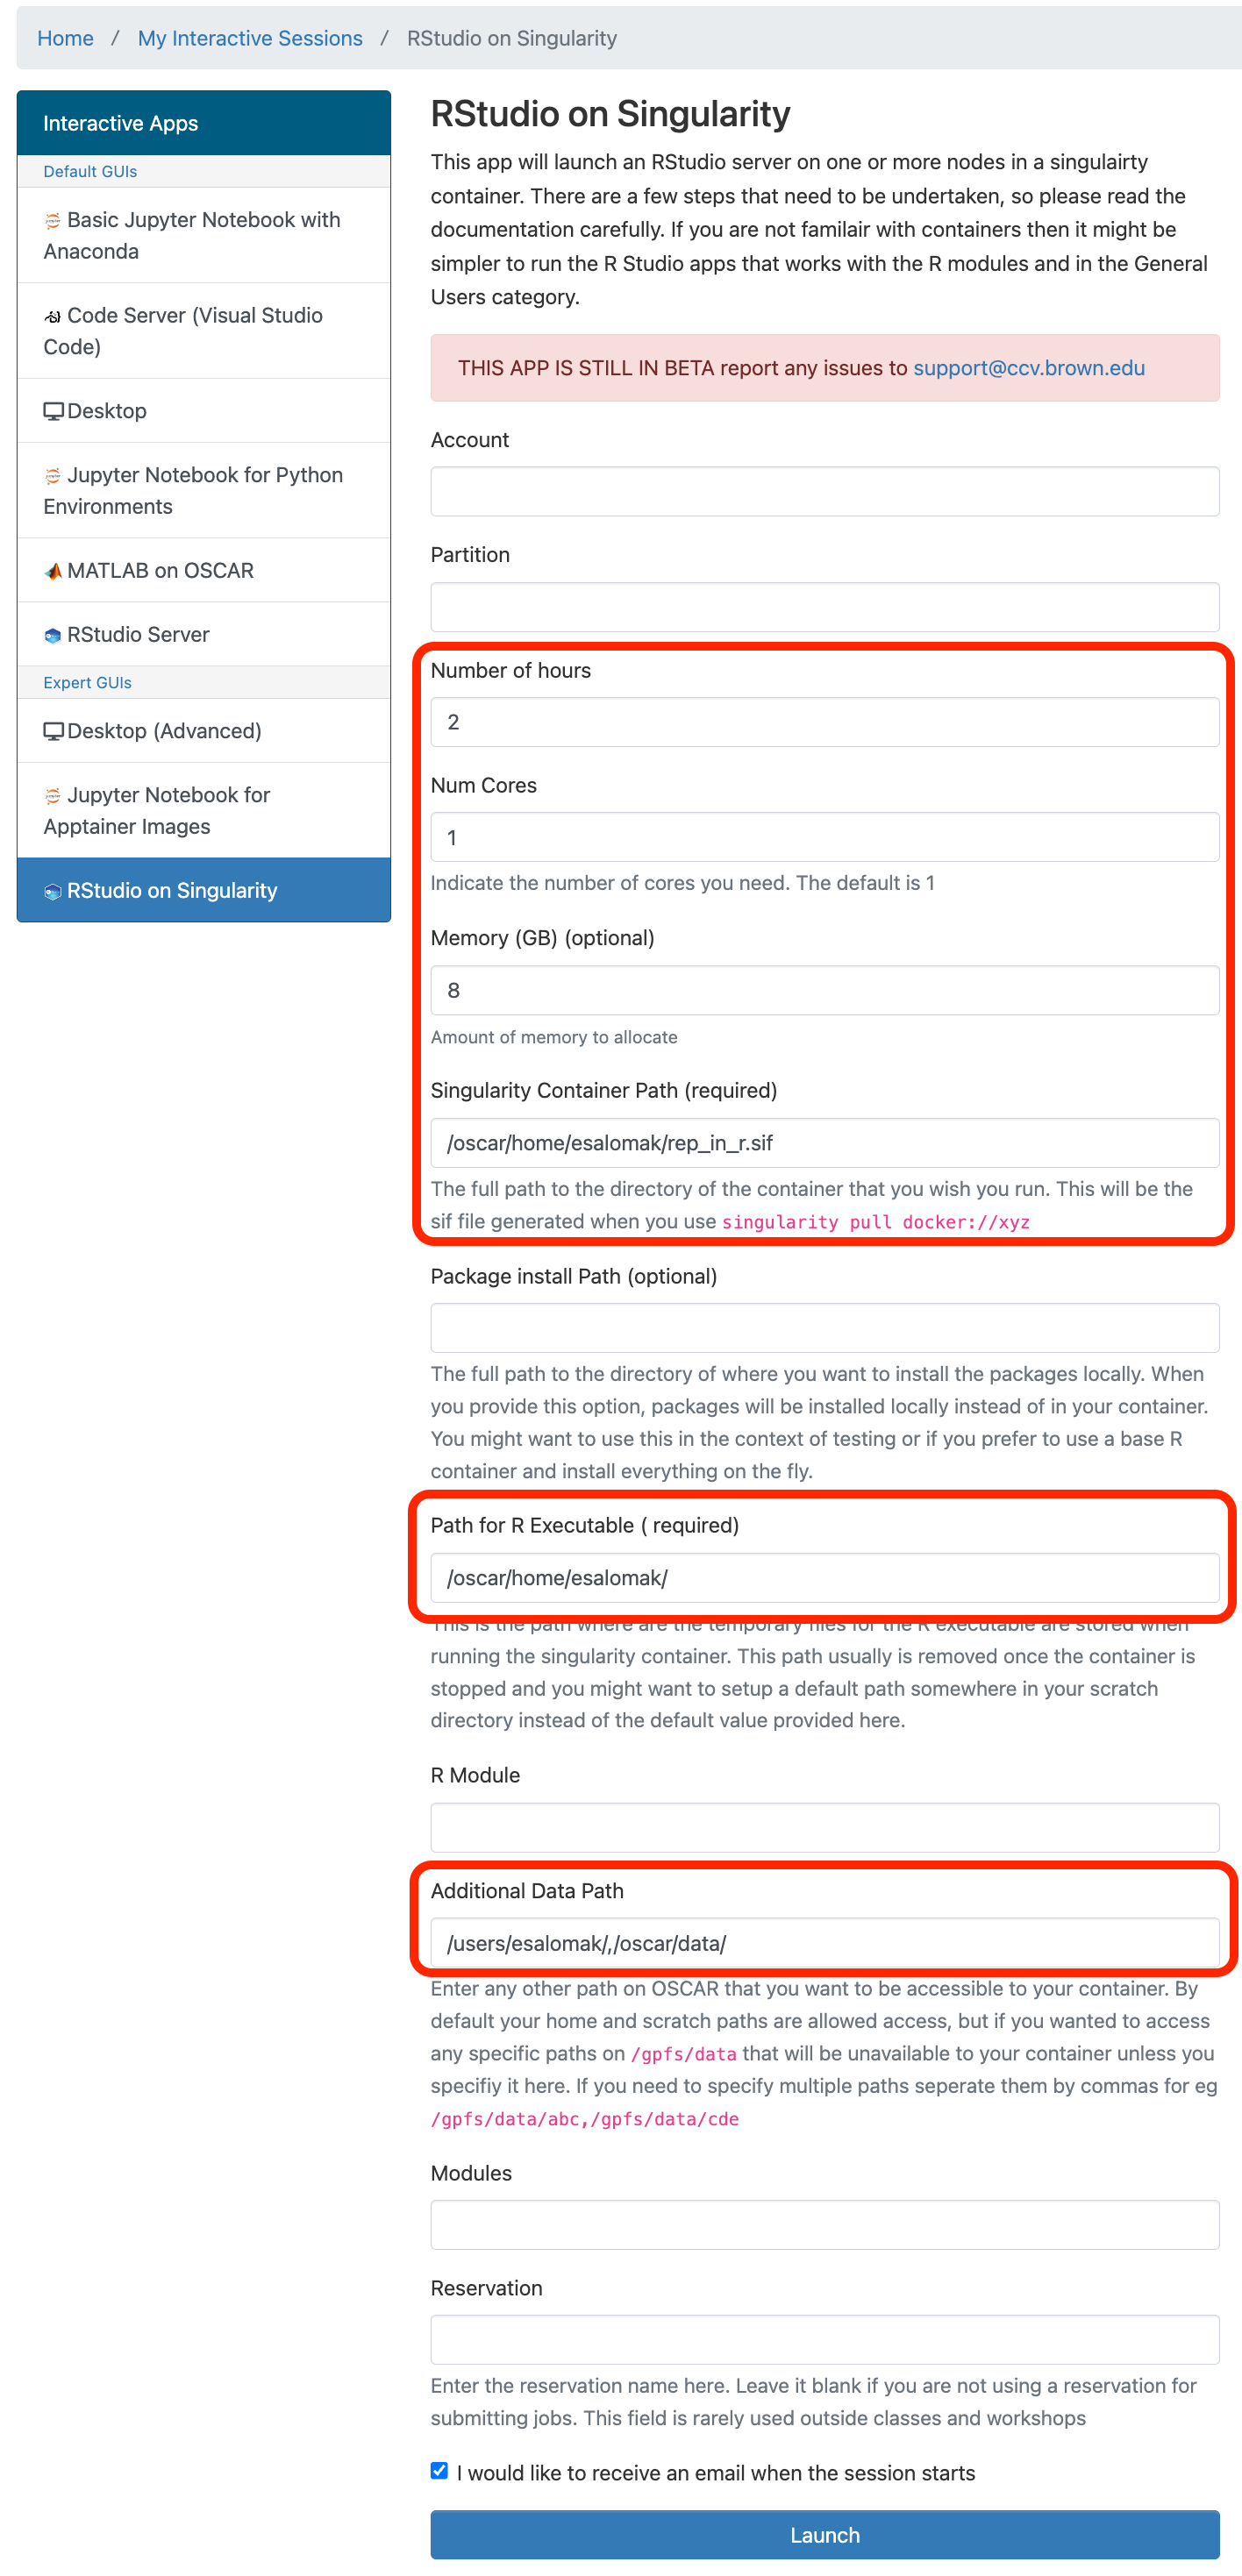
 
  
#### And push the "Launch" button  
Once the session starts, click the **Connect to Rstudio Server** button  
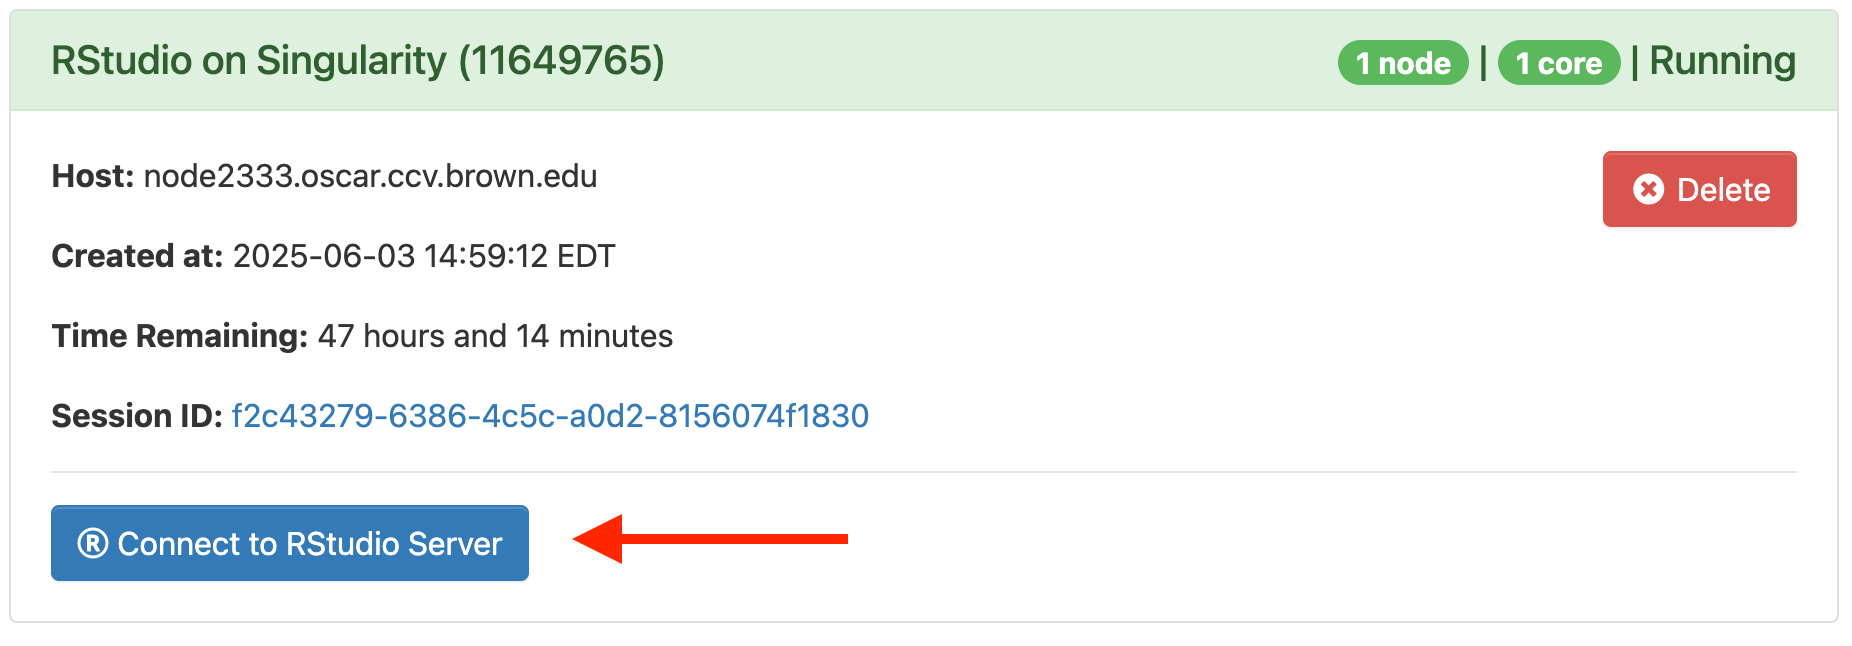  

## We will now open the R markdown notebook and continue the workshop in Rstudio  
From the dropdown in Rstudio select `File > Open File` Then navigate to `~/ccv_bootcamp_Reproducibility_R/notebook` and open the notebook titled `reproducibility_in_r.Rmd`.  

### Other ways to use a singularity image on Oscar through command line:

`singularity exec rep_in_r.sif R`  
`singularity exec rep_in_r.sif bash`  
`singularity exec rep_in_r.sif Rscript -e 'date()' -e 'format(Sys.time(), "%a %b %d %X %Y")'`  

## Key takeaways

* Maintain all code in GitHub repositories and set `here::i_am` using the [here package](https://cran.r-project.org/web/packages/here/vignettes/here.html) in your R code to the top-level directory of youre repo to access all data, metadata, and other resources.
* Build and maintain docker images with all packages required to run your analysis.
* Save and share R data files using the [qs2](https://cran.r-project.org/web/packages/qs2/index.html) package or base R functions.
    * I didn't go into this much, but `qs2` is a phenomenal package for saving large Rdata objects (relatively) quickly, which can then be shared with collaborators or published, especially when steps in analyses can take hours or even days. Save and laod intermediate files to speed up future work.    
* Use `sessionInfo()` at the end of your code to display the version of R and all loaded packages utilized to run your analysis.  
* Upon publication of your reserach, ensure your GitHub repo contains all code and is set to Public and that your docker image is publicly available.


## Questions?